# DOPPIA FENDITURA

Nel nostro caso lo schermo misurava l'ampiezza del campo elettrico su una superficie __circolare__

TODO: misure fenditura e posizione dei componenti
- $\sigma_V$ = oscillazione strumento
- $\sigma_\theta$ = 1°

In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import jax.numpy as jnp
import os
import scipy.stats as sc  
from interpolazione import probability_under_norm
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'fenditura2.csv'
fr = pd.read_csv(FILE)

In [41]:
θ = (np.array(fr['angolo (°)']) - 90) * np.pi/180
sigmaθ = np.ones_like(θ) * np.pi/180
V = np.array(fr['V (mV)']) * 10**-3
sigmaV = np.array(fr['sigmaV (mV)']) * 10**-3

## misure fenditura:

R = (80 - 62) * 0.01 # m
d = 0.07 # m 

## FENDITURE DI YOUNG

il campo elettrico (che per una singola fenditura centrata nell'origine sarabbe costante lungo tutto lo schermo) presenta un'andamento sinusoidale.

L'ampiezza dei picchi sarebbe uguale a tutti gli angoli se lo schermo fosse piatto, visto che il nostro schermo è sferico osserviamo un'andamento di tipo coseno


__NOTA:__ osserviamo solo il fenomeno di interferenza fra le due onde, la diffrazione non si nota perchè è funzione dell'intensità dell'onda non dell'ampiezza del campo elettrico


__FUNZIONE FENDITURA__

$E_{tot} = E_1 + E_2 = E_0 \left(\frac{\cos(kr_1)}{r_1} + \frac{\cos(kr_2)}{r_2}\right)\cos\theta \quad k = \frac{2\pi}{\lambda}$

$r_1 = \sqrt{{(R \sin(\theta) - \frac{d}{2})^2 + (R \cos(\theta))^2}}$\
$r_2 = \sqrt{{(R \sin(\theta) + \frac{d}{2})^2 + (R \cos(\theta))^2}}$

In [42]:
# def funzione_couscous(θ,A,B,m):
    #return jnp.abs(A*(jnp.cos(θ)**2) *jnp.cos(m*θ) + B*jnp.cos(θ) *jnp.cos(m*θ))
    


def funzione_couscous(θ,E0,λ,d):
    k = 2*np.pi/λ
    r1 = jnp.sqrt((R*jnp.sin(θ)-d/2)**2 + (R*jnp.cos(θ))**2)
    r2 = jnp.sqrt((R*jnp.sin(θ)+d/2)**2 + (R*jnp.cos(θ))**2)
    
    # cos1phi = (R**2 + r1**2 - (d/2)**2) / (2*R*r1)
    # cos2phi = (R**2 + r2**2 - (d/2)**2) / (2*R*r2)

    return E0 * jnp.abs(jnp.cos(k*r1)/r1 + jnp.cos(k*r2)/r2)* jnp.cos(θ)


# x = np.linspace(-np.pi/2,np.pi/2,1000)
# y = funzione_couscous(x,0.288,0.5,0.07)

# plt.plot(x,y)

fit_couscous = Interpolazione(θ,V,sigmaθ,sigmaV,funzione_couscous,[0.288,0.03,0.07],names=['E0','λ','d'],iteration=1)
display(fit_couscous.m)
print(fit_couscous)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 54.74                      │              Nfcn = 216              │
│ EDM = 6.12e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ E0   │  27.5e-3  │  0.7e-3   │            │            │         │         │       │
│ 1 │ λ    │ 28.26e-3  │  0.07e-3  │            │            │         │         │       │
│ 2 │ d    │  75.2e-3  │  0.4e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬────────────────────────────┐
│    │       E0        λ        d │
├────┼────────────────────────────┤
│ E0 │ 4.93e-07    31e-9 -0.03e-6 │
│  λ │    31e-9 5.11e-09    -6e-9 │
│  d │ -0.03e-6    -6e-9 1.68e-07 │
└────┴────────────────────────────┘

----------------- VALORI FIT: -----------------
E0: (2.749 ± 0.07)e-2 
λ: (2.826 ± 0.007)e-2 
d: (7.521 ± 0.041)e-2 

dof: 26
chi2: 54.74
chi2 ridotto: 2.11
pvalue: 0.0
------------------------------------------------



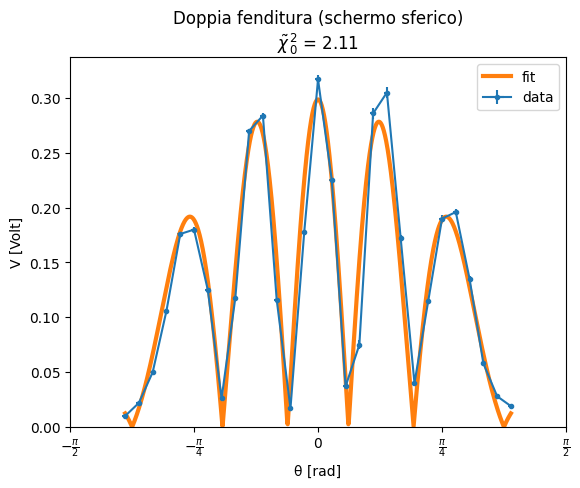

In [43]:
plt.errorbar(θ,V,yerr=sigmaV,xerr=sigmaθ,fmt='.-',label='data')

# x = np.linspace(-np.pi/2,np.pi/2,1000)
# y =( np.cos(x)**2) *fit_couscous.values['A']

# plt.plot(x,y, label='$V_0 \\cos^2(x)$')
plt.plot(*fit_couscous.draw(),label='fit',linewidth=3)

plt.ylim(0)
plt.xlim(-np.pi/2,np.pi/2)
plt.ylabel('V [Volt]')
plt.xlabel('θ [rad]')
plt.title('Doppia fenditura (schermo sferico)\n' + f'$\\tilde\chi_0^2$ = {fit_couscous.rchi2}')
plt.xticks([-np.pi/2,-np.pi/4,0,np.pi/4,np.pi/2],[r'$-\frac{\pi}{2}$',r'$-\frac{\pi}{4}$',r'$0$',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$'])
plt.legend()
plt.show()

In [47]:
FILE = dir_path + '/' + 'output.csv'
fr = pd.read_csv(FILE)
λ = np.float64(fr['λ'])
σλ = np.float64(fr['σλ'])

λf = fit_couscous.values['λ']
σλf = fit_couscous.errors['λ']

print('λ attesa: ',final_val(λ,σλ,3,-2,'m'))
print('λ fit: ',final_val(λf,σλf,3,-2,'m'))

avgλ = np.average([λ,λf],weights=1/np.array([σλ,σλf])**2)
print('λmedia: ',f'{np.round(avgλ*100,3)}e-2 m')

λ attesa:  (2.819 ± 0.104)e-2 m
λ fit:  (2.826 ± 0.007)e-2 m
λmedia:  2.826e-2 m


In [48]:
# confronti lambda

t = np.abs(λf - λ)/np.sqrt(σλf**2 + σλ **2)

print('t: ', np.round(t,2))

pval = probability_under_norm(0,1,t)
print('pvalue: ', np.round((1-pval)*100,1),'%')

t:  0.07
pvalue:  94.4 %


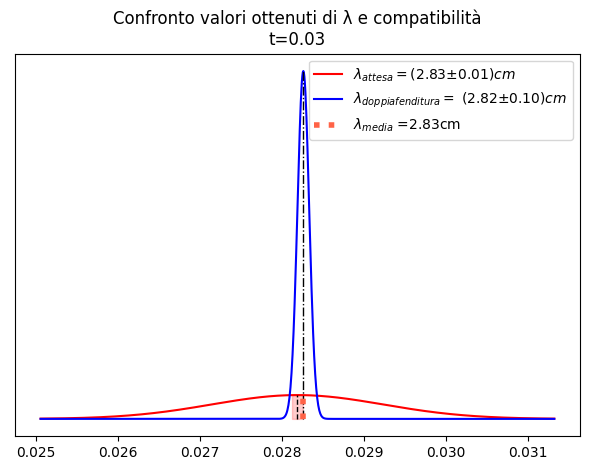

In [50]:
m,M = np.min([λ-3*σλ,λf-3*σλf]),np.max([λ+3*σλ,λf+3*σλf])
x = np.linspace(m,M,1000)

# λ attesa:  (2.819 ± 0.104)e-2 m
# λ fit:  (2.826 ± 0.007)e-2 m
# λmedia:  2.826e-2 m

λfp = '$(2.83 ± 0.01)cm$' 
λampezzadistanza = '$(2.82 ± 0.10)cm$' 
λmedia = '2.83cm'

n1 = sc.norm.pdf(x,loc=λ,scale=σλ)
plt.plot(x,n1, color='red', label='$λ_{attesa} =$' + λfp)
t = np.abs(λ - avgλ) / σλ
plt.fill_between(x= x,y1= n1,where= (λ- t*σλ < x)&(x < λ + t*σλ),color= "red",alpha= 0.2)
plt.vlines(x=λ,ymin=0,ymax=max(n1),linewidths=1.0,label="", color='black',linestyle="--")

n2 = sc.norm.pdf(x,loc=λf,scale=σλf)
plt.plot(x,n2, color='blue', label='$λ_{doppia fenditura} =$ '+ λampezzadistanza)
t = np.abs(λf - avgλ) / σλf
plt.fill_between(x= x,y1= n2,where= (λf- t*σλf < x)&(x < λf + t*σλf),color= "blue",alpha= 0.2)
plt.vlines(x=λf,ymin=0,ymax=max(n2),linewidths=1.0,label="", color='black',linestyle="-.")

plt.vlines(x=avgλ,ymax=max(n1),ymin=0,linewidths=4.0,label="$λ_{media}$ =" + λmedia, color='#FF6347',linestyle="dotted")

#plt.ylim(0,0.00005)
# plt.xticks()
#plt.xlim(1.96* (10**6),2.04* (10**6))
plt.title('Confronto valori ottenuti di λ e compatibilità\nt=0.03')
plt.tight_layout()
plt.yticks([])
plt.legend()
plt.show()